# Feature Engineering für eine Drohnen Fernsteuerung, die mit einem MPU6050 ausgestattet ist

## 1. Einlesen der Datei und überprüfen, ob die Datenreihen vollständig sind

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix as scatmat
import os


# Absolute Pfad zur Datei extrahieren
ziel_pfad = 'D:\measurements'

# CSV-Datei einlesen
data = pd.read_csv(os.path.join(ziel_pfad, 'mpu6050_kroeger_run1.csv'), sep=',', decimal='.')

# Die ersten Zeilen anzeigen
data.head()

# Informationen über den Datensatz anzeigen
data.info()

# Sind alle Klassen gleich stark vertreten?
data['RuheState'].value_counts()

# Gibt es Auffälligkeiten bei der Verteilung der Werte?
data.describe()

# Datentyp des Objektes 
type(data)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3000 entries, (0.040866, -0.111822) to (-0.003871, -0.00073)
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AccX         3000 non-null   float64
 1   AccY         3000 non-null   float64
 2   AccZ         3000 non-null   float64
 3   GyroX        3000 non-null   float64
 4   GyroY        3000 non-null   float64
 5   GyroZ        3000 non-null   float64
 6   AngleX       3000 non-null   float64
 7   AngleY       3000 non-null   float64
 8   AngleZ       3000 non-null   float64
 9   RuheState    3000 non-null   int64  
 10  FernstState  3000 non-null   int64  
 11  TranspState  3000 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 380.3 KB


pandas.core.frame.DataFrame

## 2. Irrelevante Merkmale entfernen

In [34]:
# data = data.drop(['user', 'gender'], axis=1)

# 3. Visualisierung der Verteilung der numerischen Werte

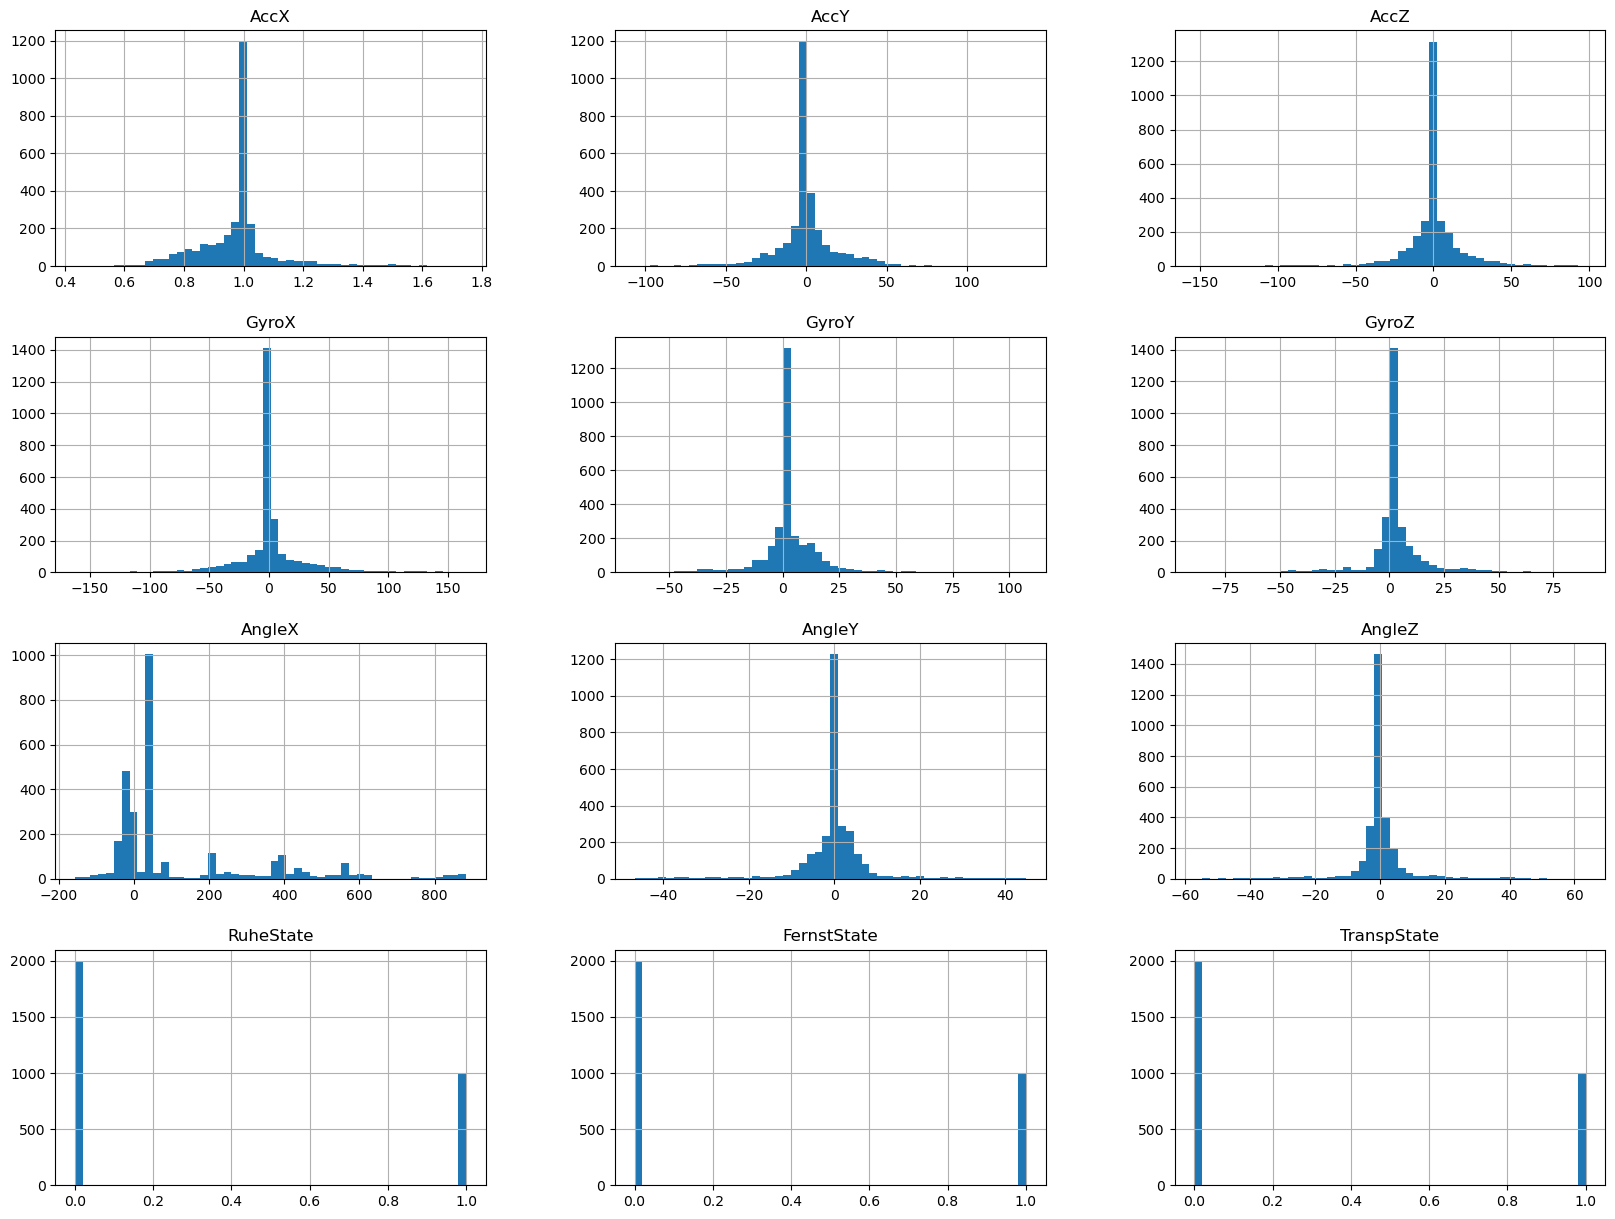

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

## 4. Überprüfen, ob es fehlerhafte Werte gibt (Bspw.: in Spalte 'AccX')

In [36]:
pd.set_option('display.max_rows', 500)
data['AccX'].value_counts()

AccX
1.000148    30
1.001369    28
1.006252    27
1.002590    26
1.003322    24
            ..
1.615013     1
1.137474     1
0.785667     1
0.796165     1
1.018215     1
Name: count, Length: 1531, dtype: int64

## 5. Fehlerhaften Wert korrigieren (Beispiel)

In [37]:
#data.loc[data['z4'] == '-14420-11-2011 04:50:23.713', 'z4'] = -144

# Spalte 'z4' in numerischen Typ umwandeln
#data['z4'] = pd.to_numeric(data['z4'])

# Informationen über den Datensatz erneut anzeigen
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3000 entries, (0.040866, -0.111822) to (-0.003871, -0.00073)
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AccX         3000 non-null   float64
 1   AccY         3000 non-null   float64
 2   AccZ         3000 non-null   float64
 3   GyroX        3000 non-null   float64
 4   GyroY        3000 non-null   float64
 5   GyroZ        3000 non-null   float64
 6   AngleX       3000 non-null   float64
 7   AngleY       3000 non-null   float64
 8   AngleZ       3000 non-null   float64
 9   RuheState    3000 non-null   int64  
 10  FernstState  3000 non-null   int64  
 11  TranspState  3000 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 380.3 KB


## 6. Aufteilung des Datensatzes in Trainings- und Validierungsdaten

In [38]:
# Aufteilung in Trainings- und Validierungsdatensätze
train, val = train_test_split(data, test_size=0.2, random_state=42)

# Anzahl der Datensätze anzeigen
len(train), len(val)

# Kopie des Trainingsdatensatzes und Validierungsdatensatzes für Modifikationen
data = train.copy()
val_data = val.copy()


## 7. Begrenzung der Auswahl auf die Sensorspalten

In [39]:
#data.hist(bins=50, figsize=(20, 15))
#plt.show()

## 8. Prüfung der Korrelationen für verschiedene Sensoren

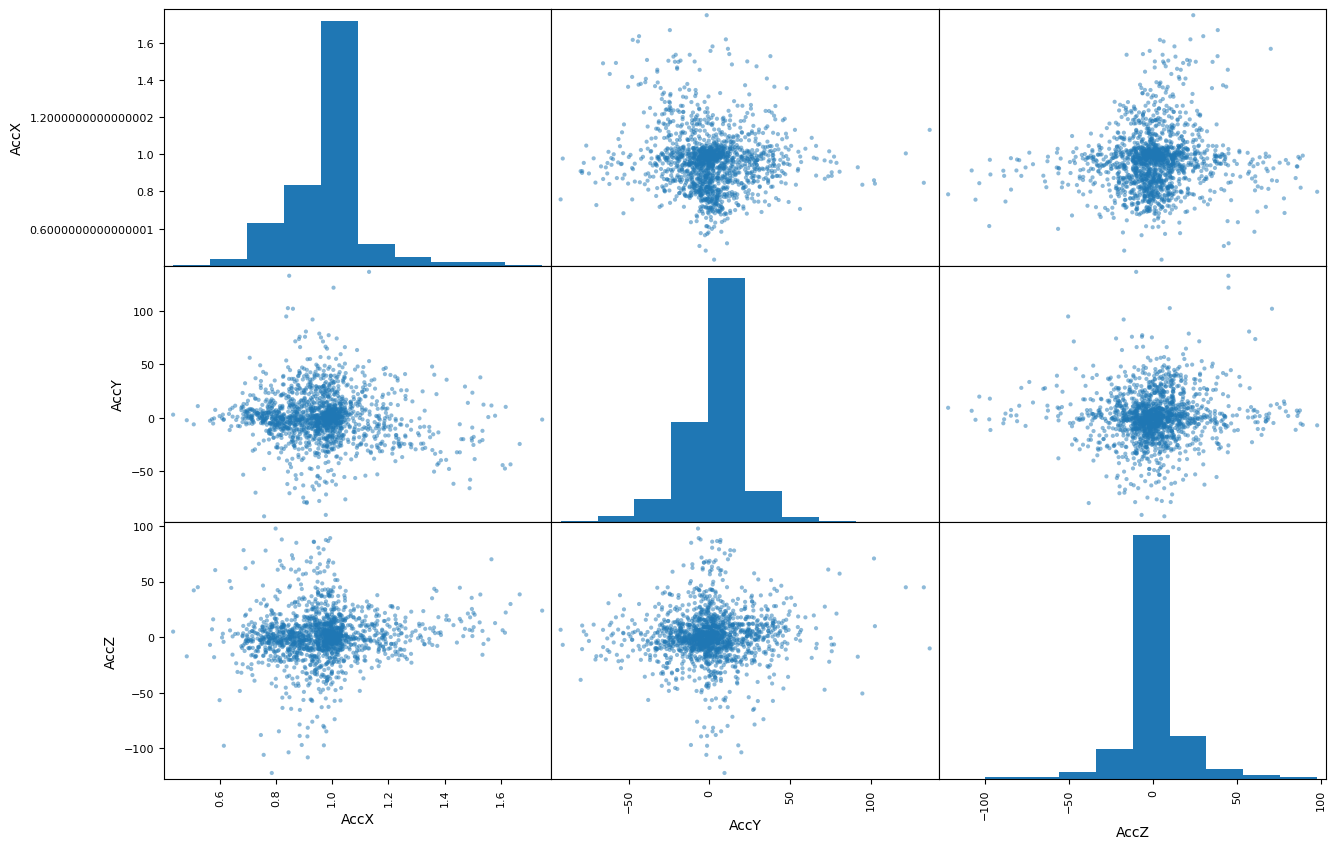

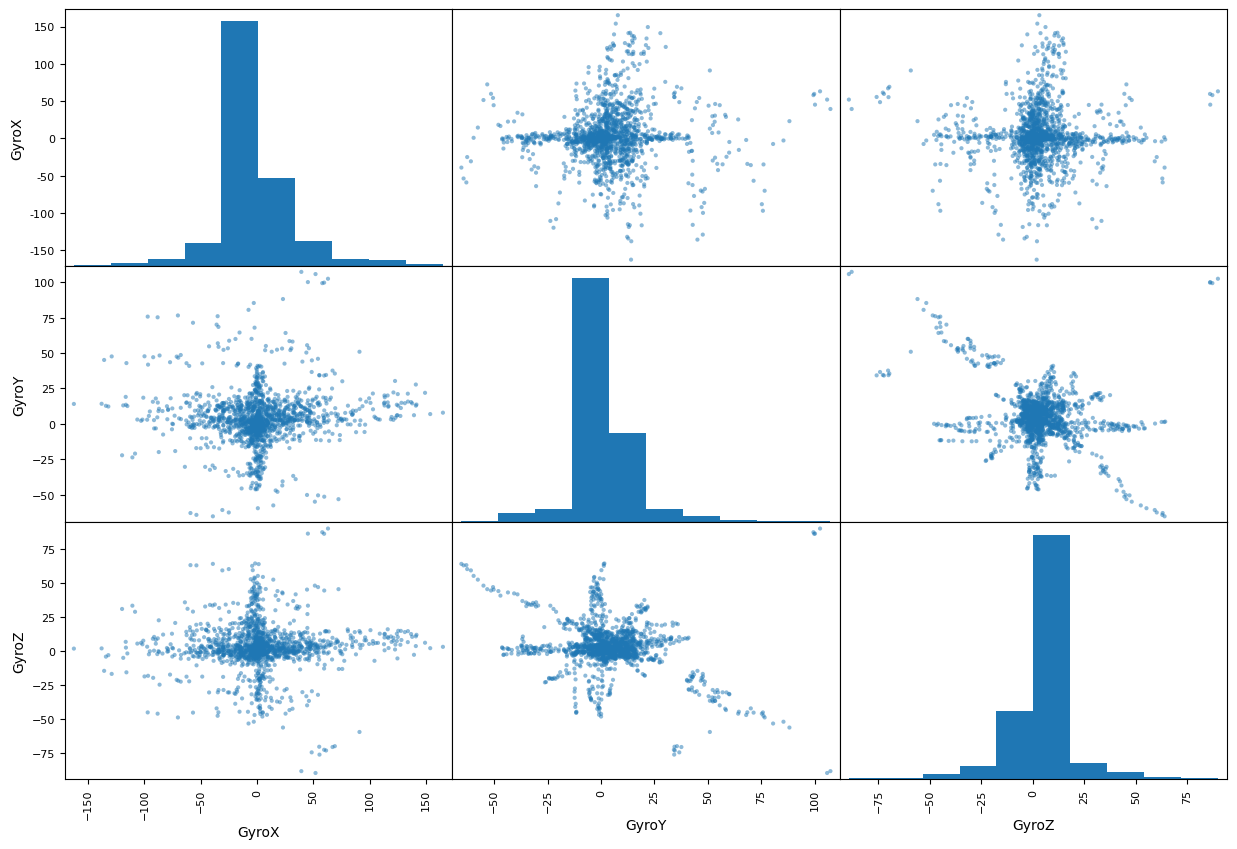

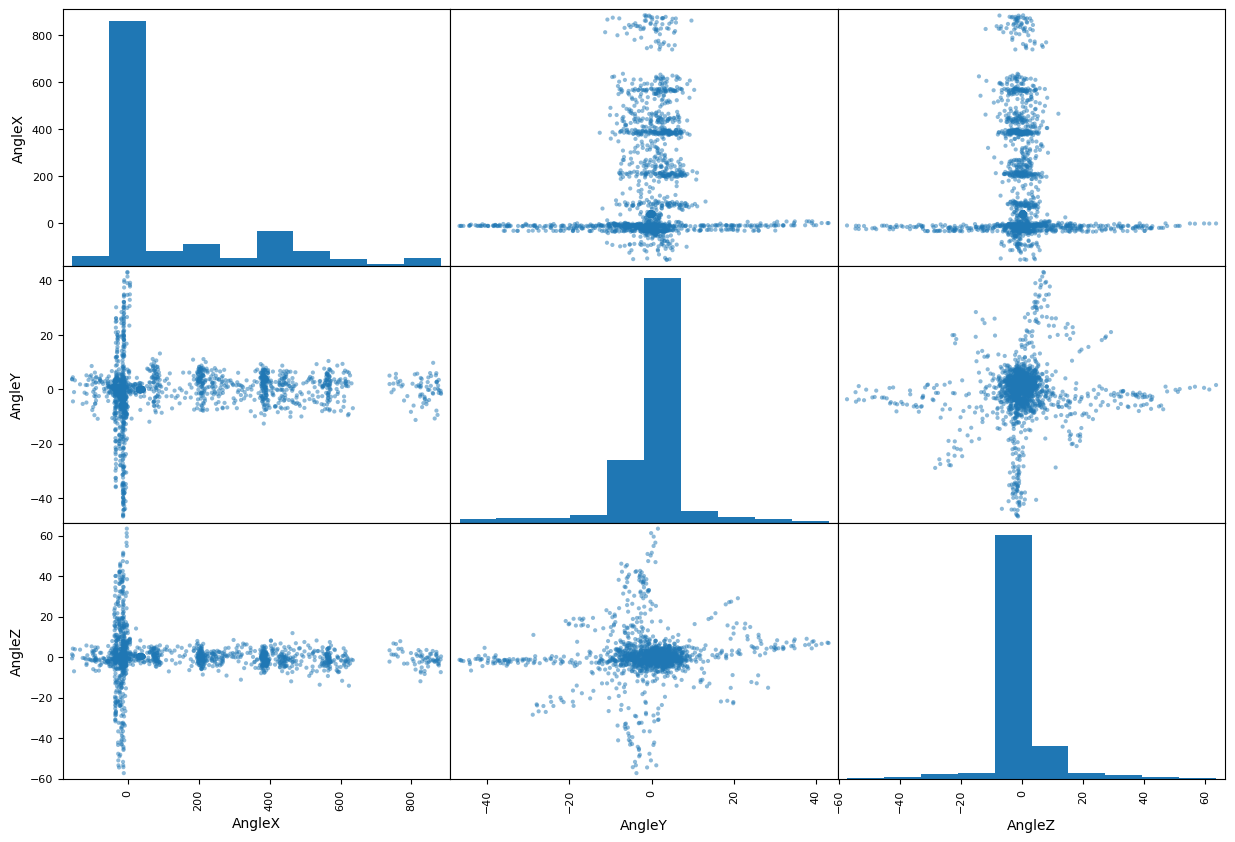

In [40]:
sensors = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'AngleX', 'AngleY', 'AngleZ', 'RuheState', 'FernstState', 'TranspState']

for sensor_group in [sensors[:3], sensors[3:6], sensors[6:9]]:
    scatmat(data[sensor_group], figsize=(15, 10))
    plt.show()

## 9. Details zu den Klassen

In [41]:
# Gruppiere nach den Klassenattributen und zähle die Anzahl der Vorkommen
class_counts = data.groupby(['RuheState', 'FernstState', 'TranspState']).size().reset_index(name='count')

# Anzeige aller Kombinationen
for i, row in class_counts.iterrows():
    print(f"Klasse {i}: Ruhe={row['RuheState']}, Fernsteuerung={row['FernstState']}, Transport={row['TranspState']} - Anzahl: {row['count']}")


Klasse 0: Ruhe=0, Fernsteuerung=0, Transport=1 - Anzahl: 783
Klasse 1: Ruhe=0, Fernsteuerung=1, Transport=0 - Anzahl: 803
Klasse 2: Ruhe=1, Fernsteuerung=0, Transport=0 - Anzahl: 814


## 10. Scatterplots der unskalierten Daten für verschiedene Sensorpaare

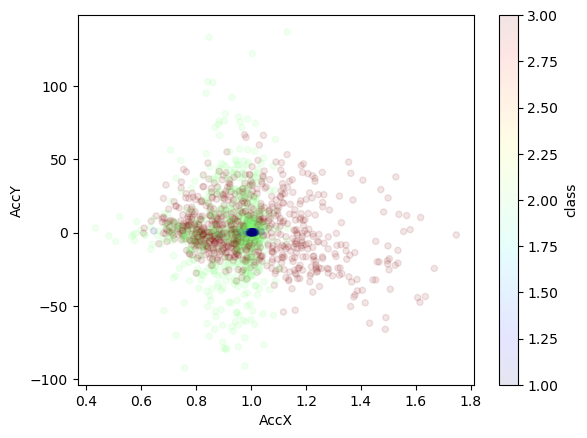

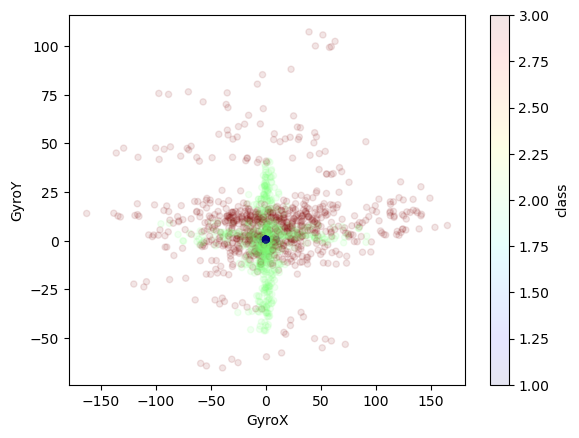

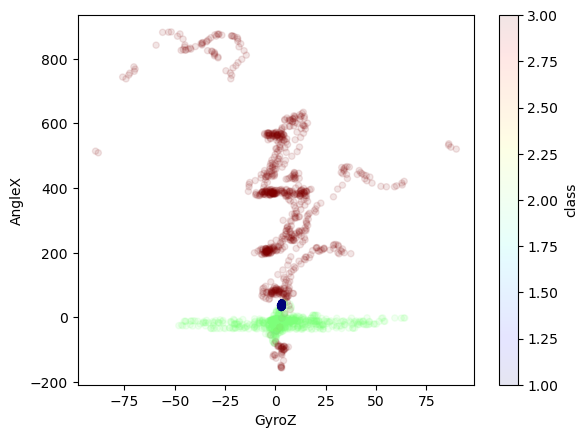

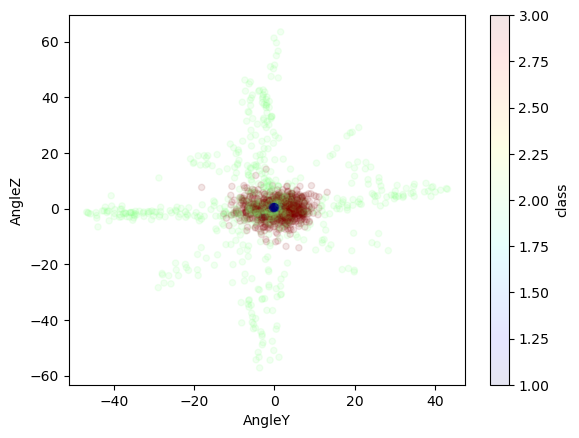

In [42]:
# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data['class'] = data.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)

# Visualisiere Scatterplots für jedes Sensor-Paar
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]
for pair in sensor_pairs:
    data.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c='class', cmap=plt.get_cmap('jet'))
    #plt.title(f'Unskalierte Werte - {pair[0]} vs. {pair[1]}')
    plt.show()

# Entferne die temporäre 'class'-Spalte
data.drop('class', axis=1, inplace=True)


## 11. One Hot encoding der Klasse durchführen, wenn noch nicht geschehen (Beispiel)

In [43]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(categories='auto');
#data_label_matrix = data["class"].values.reshape(-1, 1)
#data_labels_1hot = encoder.fit_transform(data_label_matrix)
#data_labels_1hot.shape

## 12. Skalierung der Messwerte

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sichern der Klassen in einem extra Array
data_labels_1hot = data[["RuheState", "FernstState", "TranspState"]].values

# Kopie des ursprünglichen DataFrame für die skalierten Daten
data_scaled = data.drop(["RuheState", "FernstState", "TranspState"], axis=1).copy()

# Anwenden des Skalierers
scaler = MinMaxScaler()
#scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_scaled)

# Kombinieren von skalierten Daten und Klassenlabels in einem DataFrame
data_scaled_df = pd.DataFrame(np.concatenate((data_scaled, data_labels_1hot), axis=1),
                               columns=list(data.columns))


## 13. Skatterplots von Messwertpaaren mit vorheriger Skalierung

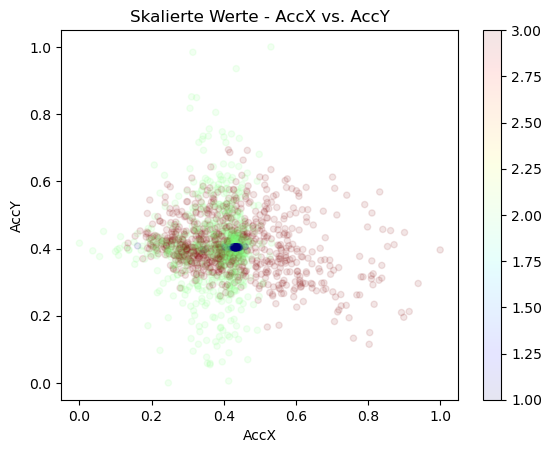

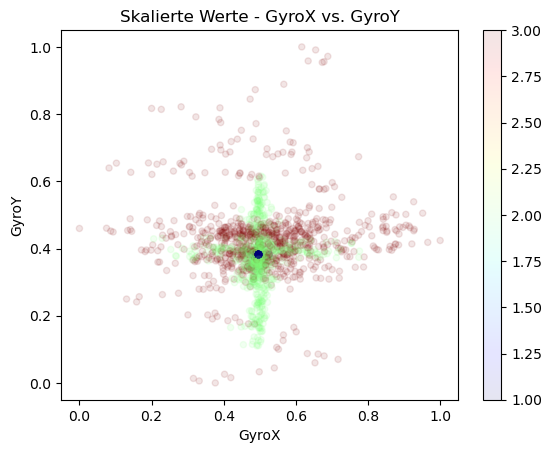

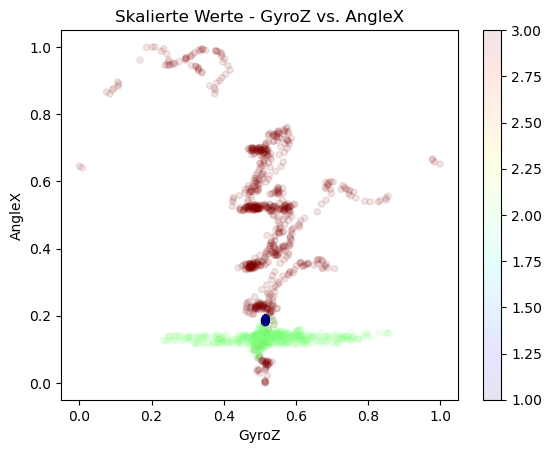

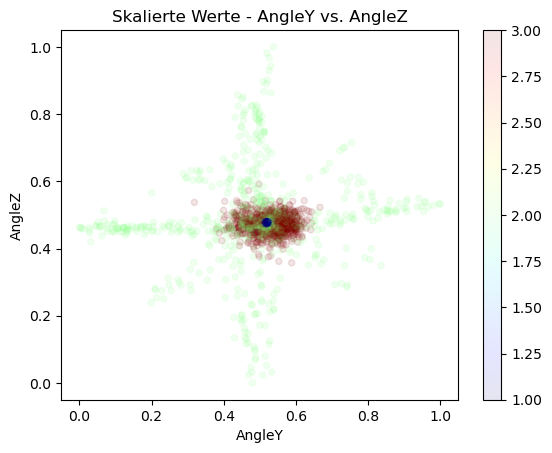

In [45]:
# Extrahiere die Spalten RuheState, FernstState, TranspState aus data
class_columns = data[["RuheState", "FernstState", "TranspState"]]


# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data_scaled_df['class'] = data_scaled_df.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)


data_scaled_df[["RuheState", "FernstState", "TranspState", "class"]] = data_scaled_df[["RuheState", "FernstState", "TranspState", "class"]].astype(int)
data_scaled_df


# Visualisiere Scatterplots für jedes Sensor-Paar mit den skalierten Werten und den originalen Klassen
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]
for pair in sensor_pairs:
    data_scaled_df.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c=data_scaled_df['class'], cmap=plt.get_cmap('jet'))
    plt.title(f'Skalierte Werte - {pair[0]} vs. {pair[1]}')
    plt.show()

## 14. Darstellen aller möglichen Kombinationen, der skalierten Merkmale

36


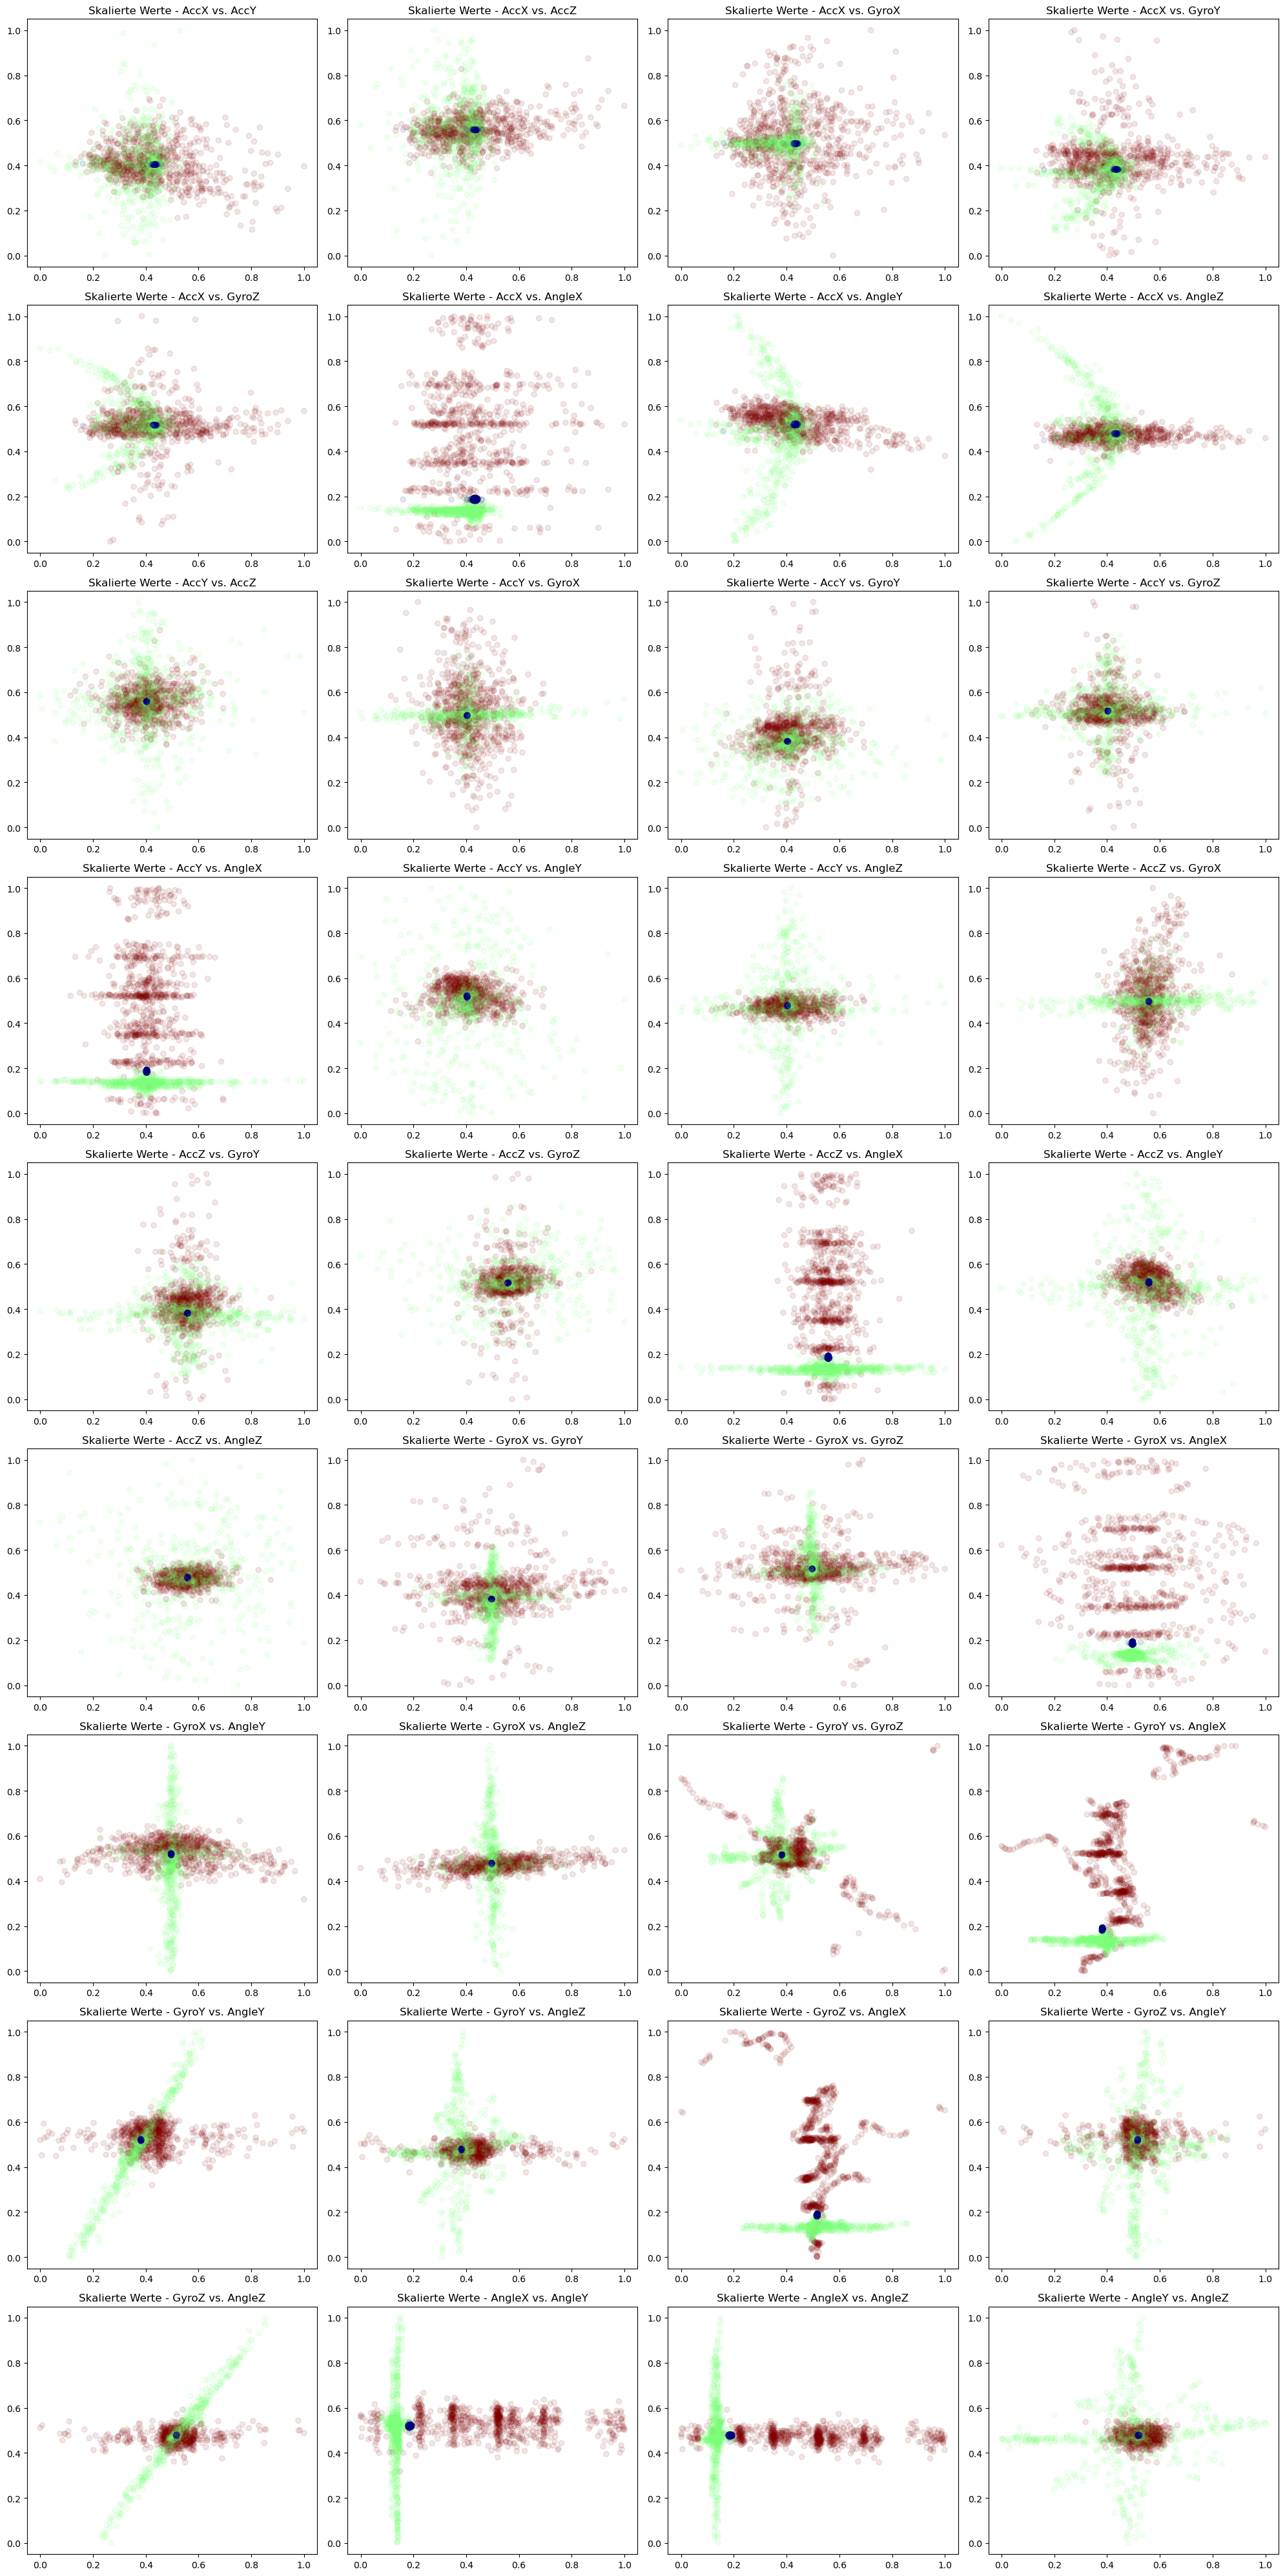

In [46]:
from itertools import combinations

# Liste aller Labels
all_labels = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'AngleX', 'AngleY', 'AngleZ', 'RuheState', 'FernstState', 'TranspState']

# Erstelle alle möglichen Kombinationen von Label-Paaren
label_pairs = list(combinations(all_labels[0:9], 2))
print(len(label_pairs))

# Anzahl der Zeilen und Spalten für die Subplots
num_rows = 9  # Anzahl der gewünschten Zeilen
num_cols = 4  # Anzahl der gewünschten Spalten

# Erstelle Subplots
#plt.figure(figsize=(10, 8))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Iteriere durch Label-Paare und erstelle Scatterplots
for i in range(num_rows):
    for j in range(num_cols):
        label_pair = label_pairs[i * num_cols + j]
        axs[i, j].scatter(data_scaled_df[label_pair[0]], data_scaled_df[label_pair[1]], alpha=0.1, c=data_scaled_df['class'], cmap=plt.get_cmap('jet'))
        axs[i, j].set_title(f'Skalierte Werte - {label_pair[0]} vs. {label_pair[1]}')

# Verbessere das Layout
plt.tight_layout()
plt.show()


# 16. Training des kNN

In [47]:
from sklearn import neighbors
import numpy as np

num_features = 14
X = np.zeros([len(data_scaled_df), num_features])
y = data_scaled_df['class']

k = 15
clf = neighbors.KNeighborsClassifier(n_neighbors=k)
features = data_scaled_df.drop(columns='class').drop(columns='RuheState').drop(columns='FernstState').drop(columns='TranspState')
clf.fit(features, y)


KNeighborsClassifier(n_neighbors=15)

# 17. Prediction

In [48]:
#Prediction mit Test-Array
y_predict = clf.predict(features)
y_predict
acc = np.mean(y_predict == (data_scaled_df['class']).astype(int).values)
acc

0.98125

In [49]:
# Daten Skalieren
data_scaled_val = scaler.fit_transform(val_data.iloc[:, 0:12])


# Skalierte Werte in einem neuen DataFrame mit den ursprünglichen Spaltennamen
data_scaled_val_df = pd.DataFrame(data_scaled_val, columns=data.columns)

# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data_scaled_val_df['class'] = data_scaled_val_df.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)
data_scaled_val_df

# Extraktion der features und labels aus den skalierten Validierungsdaten
val_labels = data_scaled_val_df['class']
val_data = data_scaled_val_df.drop(columns='RuheState').drop(columns='class').drop(columns='TranspState').drop(columns='FernstState')

# Prediction
prediction = clf.predict(val_data)

acc = np.mean(prediction == val_labels.astype(int).values)
acc

0.6716666666666666

In [50]:
# Prediction mit Validation-Array

# Skalierte Werte in einem neuen DataFrame mit den ursprünglichen Spaltennamen
val_df = pd.DataFrame(val, columns=data.columns)

# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
val_df['class'] = val_df.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)

val_labels = val_df['class']
val_data = val_df.drop(columns='RuheState').drop(columns='class').drop(columns='TranspState').drop(columns='FernstState')

# Prediction
prediction = clf.predict(val_data)

acc = np.mean(prediction == val_labels.astype(int).values)
acc

0.6416666666666667

# 18. Confusions Matrix

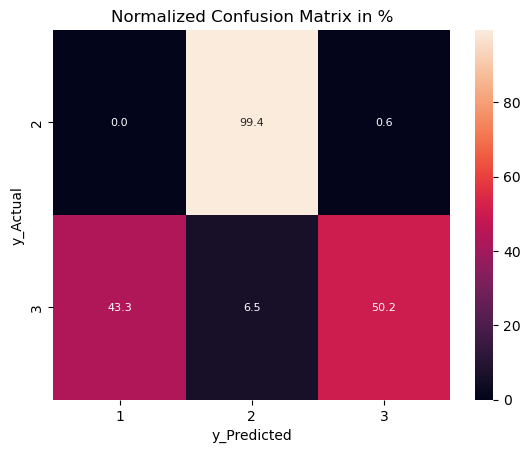

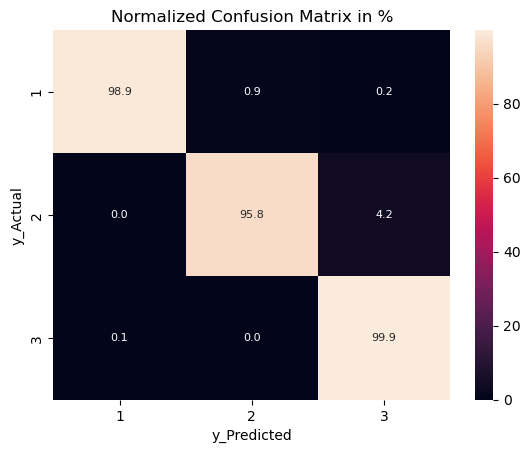

In [51]:
import seaborn as sns
import pandas as pd

def confusion_matrix(results, labels):
    data = {'y_Actual': results.astype(np.uint8), 'y_Predicted': labels}
    df = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
    cm = pd.crosstab(df['y_Actual'], df['y_Predicted'])
    cm = cm.astype(np.float32) / cm.sum(axis=1).values[:, np.newaxis] * 100.0
    sns.heatmap(cm, annot=True, fmt='.1f', annot_kws={"size": 8})
    plt.title('Normalized Confusion Matrix in %')
    plt.show()

confusion_matrix(prediction, val_labels.astype(int).values) # val confusion Matrix
confusion_matrix(y_predict, (data_scaled_df['class']).astype(int).values)   # train confusion Matrix


## 19. Übersicht Validierungsdaten (prediction und label)

In [52]:
prediction.astype(np.uint8)

array([3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3,

In [53]:
val_labels.astype(int).values

array([2, 2, 2, 3, 1, 2, 2, 1, 3, 1, 1, 3, 3, 2, 1, 3, 2, 3, 1, 1, 3, 3,
       3, 1, 2, 1, 1, 2, 3, 2, 2, 2, 3, 1, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3,
       2, 2, 1, 3, 1, 2, 2, 1, 3, 1, 3, 1, 2, 3, 1, 2, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 1, 1, 1, 1, 2, 2, 3, 2, 1, 3, 1, 2,
       1, 1, 3, 2, 1, 2, 2, 3, 1, 1, 3, 2, 1, 3, 3, 2, 2, 3, 2, 3, 3, 2,
       1, 3, 1, 1, 3, 1, 3, 3, 2, 2, 1, 2, 3, 2, 2, 1, 2, 3, 3, 3, 1, 2,
       2, 2, 3, 3, 3, 2, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 3, 1,
       3, 2, 3, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 1, 1, 3, 1, 1, 2, 3, 1, 2,
       1, 2, 3, 2, 3, 1, 2, 1, 3, 3, 3, 1, 2, 2, 3, 2, 2, 3, 2, 1, 3, 1,
       3, 3, 2, 2, 3, 1, 2, 2, 1, 1, 3, 1, 1, 2, 2, 1, 3, 3, 3, 3, 2, 1,
       2, 2, 3, 1, 2, 3, 3, 1, 2, 3, 2, 2, 1, 3, 3, 2, 3, 2, 1, 3, 1, 3,
       1, 2, 3, 3, 2, 3, 3, 1, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 2,
       3, 1, 1, 1, 1, 3, 2, 2, 1, 3, 2, 2, 1, 2, 3, 3, 2, 3, 3, 3, 3, 2,
       3, 1, 3, 3, 1, 1, 2, 2, 2, 1, 3, 1, 1, 3, 3,